# Autoría:

                     Manuel López Amo-Ocón
                     Alejangro Galván Pérez-Ilzarbe
                     Santiago Cebellán
                     Alejandro Meza Tudela

# COVID-19 

La enfermedad por coronavirus (COVID 19) es una enfermedad infecciosa causada por un coronavirus recientemente descubierto. La mayoría de las personas que enferman de COVID 19 experimentan síntomas de leves a moderados y se recuperan sin tratamiento especial.


# Cómo se propaga

El virus que causa la COVID‑19 se transmite principalmente a través de las gotículas generadas cuando una persona infectada tose, estornuda o espira. Estas gotículas son demasiado pesadas para permanecer suspendidas en el aire y caen rápidamente sobre el suelo o las superficies.

Usted puede infectarse al inhalar el virus si está cerca de una persona con COVID‑19 o si, tras tocar una superficie contaminada, se toca los ojos, la nariz o la boca.

Mas información:
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/home.ht

En el presente Notebook, se ha realizado una primera aproximación del comportamiento de esta enfermedad sobre una población dada. En un futuro, el código se podría adaptar para cualquier otra enfermedad. 

# Librerías

In [1]:
#Importar librerias? Pues claro que me importan!
!pip install plotly==4.7.0
!pip install seaborn==0.10.1
import numpy as np #agrega soporte para vectores y matrices, contituye biblioteca de funciones de alto nivel
from numpy import random #random permite la generacion de numeros aleatorios 
from random import choices #choices esta dedicado a la representacion de pesos 
import os 
import seaborn as sns
import matplotlib.pyplot as plt #Dedicado a la representacion grafica 
from scipy.stats import rv_discrete
import pandas as pd


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Variables globales

In [2]:
#Definicion de variables 
mediaincubacion = 7 #media de dias de la incubacion
desvincubacion = 3 #desviacion de la incubacion 
mediaduracion = 14 #media de duracion 
desvduracion = 5 #deviacion de la duracion 
posibilidadContagio = 0.9990 #posibilidad de que una sola persona no te contagie en una hora en el mismo edificio
cambioEstadoInicial = 15 #tiempo en dias que se tarda en cambiar de estado
numpersonas = 800 #numero de personas de la simulacion 
personasEdificio = 50 #numero de personas/edificio 
horassimulacion = 2400 #horas de la simulacion 
maxPiso=16

#Primera columna=rangos de edades, Segunda columna= Mortalidades totales
mortalidadEdadesCovid=[[10,20,30,40,50,60,70,80,1000],[0.01,0.2,0.2,0.2,0.4,1.3,3.6,8,14.9]]
mortalidadEdadesCovid[1][:]=[x /0.6 for x in mortalidadEdadesCovid[1][:]]#dividimos entre 0.6 para tener en cuenta a los asintomaticos

# Definición de clases

De cara a la primera versión del simulador, se ha optado por la creación de la clase persona, y la clase simulador. 

Atributos clase persona: idpersona, edad, estados posibles, estado, lugar, lugar original, dia estado, cambio estado, contador infecciones, dni, edificio muerte

Atributos de la clase simulador: ciudad, dia, hora, numpersonas inicial, numpersonas, numedificios, capacidades, catálogo de personas, cementerio, distrEdad, registro sanos, registro muertos, mortalidades edadeds Covid

In [3]:
from SimuladorV15 import *
from EdificioV16 import *
from PersonaV14 import *

# Funciones

In [4]:

#Funcion que permite mostrar en pantalla la ciudad
def printearciudad(ciudad):        
    for j in range(len(ciudad)):
        for i in range(len(ciudad[j])):
            print(ciudad[j][i])
        print()        
        
#Funcion que dada la ciudad, y un indice, permite imprimir el edificio que corresponda a ese indice
def printearEdificio(ciudad , i):
     for j in range(len(ciudad[i])):
        print(ciudad[i][j])
    

# Código encargado de la simulación

Num.Edificio: 0 , PersonasEdificio: 49, MaxCapacidad: 16
Num.Edificio: 1 , PersonasEdificio: 49, MaxCapacidad: 16
Num.Edificio: 2 , PersonasEdificio: 68, MaxCapacidad: 16
Num.Edificio: 3 , PersonasEdificio: 39, MaxCapacidad: 16
Num.Edificio: 4 , PersonasEdificio: 72, MaxCapacidad: 16
Num.Edificio: 5 , PersonasEdificio: 73, MaxCapacidad: 16
Num.Edificio: 6 , PersonasEdificio: 63, MaxCapacidad: 16
Num.Edificio: 7 , PersonasEdificio: 72, MaxCapacidad: 16
Num.Edificio: 8 , PersonasEdificio: 38, MaxCapacidad: 16
Num.Edificio: 9 , PersonasEdificio: 59, MaxCapacidad: 16
Num.Edificio: 10 , PersonasEdificio: 45, MaxCapacidad: 16
Num.Edificio: 11 , PersonasEdificio: 38, MaxCapacidad: 16
Num.Edificio: 12 , PersonasEdificio: 71, MaxCapacidad: 16
Num.Edificio: 13 , PersonasEdificio: 61, MaxCapacidad: 16
Num.Edificio: 14 , PersonasEdificio: 3, MaxCapacidad: 16
800 50 16 7
[<EdificioV16.Oficina object at 0x000001A0D7C3E7B8>, <EdificioV16.Oficina object at 0x000001A0D7C3EC18>, <EdificioV16.Oficina obj

Contagio en la casa 8!
0.004690759330076566
Contagio en el vestibulo de la oficina 5!
0.00026977714778109174
Contagio en la casa 8!
0.0002386373362289751
[0.9999880952380953, 1.1904761904713013e-05] 3
[0.9822619047619048, 0.01773809523809522] 87
[0.9997619047619047, 0.00023809523809525945] 37
[0.9995238095238095, 0.0004761904761905189] 44
[0.9822619047619048, 0.01773809523809522] 93
[0.9999880952380953, 1.1904761904713013e-05] 4
[0.9997619047619047, 0.00023809523809525945] 40
[0.9997619047619047, 0.00023809523809525945] 38
[0.9822619047619048, 0.01773809523809522] 82
[0.9995238095238095, 0.0004761904761905189] 44
[0.9997619047619047, 0.00023809523809525945] 27
--------
 
 
Dia: 19 || Hora: 0
-----------


 
 
 
 
--------
0.0024152615549197787
0.003134165715474202
0.003877044787677919
0.0005862226876298671
Contagio en el vestibulo de la oficina 12!
0.0007261345817959342
Contagio en la oficina 4!
9.733251662247255e-05
[0.9999880952380953, 1.1904761904713013e-05] 3
[0.9997619047619047, 0

Contagio en la oficina 3!
0.0018888597272865848
0.0070134289153190865
Contagio en la casa 9!
0.000521202716951441
[0.998452380952381, 0.00154761904761902] 52
[0.9995238095238095, 0.0004761904761905189] 50
[0.9957142857142857, 0.004285714285714337] 66
[0.9997619047619047, 0.00023809523809525945] 18
[0.9995238095238095, 0.0004761904761905189] 41
[0.9995238095238095, 0.0004761904761905189] 44
[0.9997619047619047, 0.00023809523809525945] 29
[0.9997619047619047, 0.00023809523809525945] 40
[0.9997619047619047, 0.00023809523809525945] 38
[0.9822619047619048, 0.01773809523809522] 82
[0.9904761904761905, 0.00952380952380949] 71
[0.9995238095238095, 0.0004761904761905189] 42
[0.9995238095238095, 0.0004761904761905189] 44
[0.998452380952381, 0.00154761904761902] 54
[0.9997619047619047, 0.00023809523809525945] 37
[0.9904761904761905, 0.00952380952380949] 78
[0.9995238095238095, 0.0004761904761905189] 46
[0.9997619047619047, 0.00023809523809525945] 27
[0.9997619047619047, 0.00023809523809525945] 38

0.004433038215669649
Contagio en la oficina 3!
0.001935470642547732
Contagio en la oficina 3!
1.2426034218138149e-05
Contagio en la oficina 5!
0.00038622077571803803
0.0007040678260455957
[0.9995238095238095, 0.0004761904761905189] 50
[0.9957142857142857, 0.004285714285714337] 66
[0.9957142857142857, 0.004285714285714337] 70
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 18
[0.9995238095238095, 0.0004761904761905189] 41
[0.9957142857142857, 0.004285714285714337] 63
[0.9822619047619048, 0.01773809523809522] 91
[0.9995238095238095, 0.0004761904761905189] 43
[0.9997619047619047, 0.00023809523809525945] 29
[0.9957142857142857, 0.004285714285714337] 61
[0.9904761904761905, 0.00952380952380949] 71
[0.9995238095238095, 0.0004761904761905189] 42
[0.9995238095238095, 0.0004761904761905189] 44
[0.998452380952381, 0.00154761904761902] 54
[0.9997619047619047, 0.00023809523809525945] 16
[0.998452380952381, 0.00154761904761902] 57
[0.9904761904761905, 0.0095

0.0005320702668080157
0.000271527251312631
[0.9995238095238095, 0.0004761904761905189] 50
[0.9995238095238095, 0.0004761904761905189] 47
[0.9957142857142857, 0.004285714285714337] 66
[0.9957142857142857, 0.004285714285714337] 70
[0.9957142857142857, 0.004285714285714337] 68
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 18
[0.9995238095238095, 0.0004761904761905189] 41
[0.998452380952381, 0.00154761904761902] 51
[0.9997619047619047, 0.00023809523809525945] 15
[0.9957142857142857, 0.004285714285714337] 63
[0.9957142857142857, 0.004285714285714337] 64
[0.9997619047619047, 0.00023809523809525945] 28
[0.9822619047619048, 0.01773809523809522] 91
[0.998452380952381, 0.00154761904761902] 59
[0.9904761904761905, 0.00952380952380949] 76
[0.9995238095238095, 0.0004761904761905189] 45
[0.9995238095238095, 0.0004761904761905189] 43
[0.9904761904761905, 0.00952380952380949] 79
[0.9997619047619047, 0.00023809523809525945] 20
[0.9997619047619047, 0.0002380952

0.00012111633165567959
Contagio en el vestibulo de la oficina 6!
0.0006744575178413426
Contagio en la casa 4!
0.00016282520934440825
0.001352180703743766
Contagio en la casa 11!
0.0009238145246668328
0.001069780503745843
Contagio en la casa 11!
0.0005750357642425596
5.010728474841297e-05
Contagio en la casa 6!
0.00442950158196187
0.0006713956589604608
Contagio en el vestibulo de la oficina 1!
0.001894742250532211
Contagio en la casa 13!
0.0035243053203329877
0.00031247438089210267
[0.9904761904761905, 0.00952380952380949] 77
[0.9995238095238095, 0.0004761904761905189] 47
[0.9957142857142857, 0.004285714285714337] 68
[0.998452380952381, 0.00154761904761902] 51
[0.9904761904761905, 0.00952380952380949] 71
[0.9957142857142857, 0.004285714285714337] 64
[0.9997619047619047, 0.00023809523809525945] 15
[0.9997619047619047, 0.00023809523809525945] 22
[0.9957142857142857, 0.004285714285714337] 64
[0.9997619047619047, 0.00023809523809525945] 28
[0.9997619047619047, 0.00023809523809525945] 40
[0.

Contagio en la casa 13!
0.0004502150287747364
Contagio en el vestibulo de la oficina 7!
0.00029798861616592287
Contagio en la casa 3!
0.000530828364497804
0.0011801191498345132
0.001627445892470214
Contagio en la oficina 9!
0.00022346926751226626
0.0010715974034741782
Contagio en la oficina 3!
0.00033972407491855705
Contagio en la oficina 6!
0.003881755047288049
Contagio en el vestibulo de la oficina 6!
6.795610047460876e-05
0.0005759292556429818
0.0007610496557941548
Contagio en el vestibulo de la oficina 6!
0.0016211860814059342
Contagio en la casa 4!
0.0006150208873834107
0.0013259281156617897
[0.9904761904761905, 0.00952380952380949] 77
[0.9995238095238095, 0.0004761904761905189] 47
[0.998452380952381, 0.00154761904761902] 51
[0.9904761904761905, 0.00952380952380949] 71
[0.9904761904761905, 0.00952380952380949] 73
[0.9957142857142857, 0.004285714285714337] 64
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 15
[0.9997619047619047, 0.000238095

0.0006010490408823177
Contagio en la oficina 5!
0.0005685915954597442
0.00042833746536552475
0.0028651280348530594
0.0019423330364197744
0.0019324531916578014
0.00030775666306148697
0.004036158057524664
Contagio en la casa 12!
0.002805426888151774
Contagio en la casa 0!
0.0007902783922150158
Contagio en la casa 1!
0.0005760812203313703
Contagio en la casa 12!
0.0006762496389750572
[0.9997619047619047, 0.00023809523809525945] 39
[0.9904761904761905, 0.00952380952380949] 77
[0.998452380952381, 0.00154761904761902] 51
[0.9904761904761905, 0.00952380952380949] 71
[0.9904761904761905, 0.00952380952380949] 73
[0.9957142857142857, 0.004285714285714337] 64
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 15
[0.9997619047619047, 0.00023809523809525945] 38
[0.9997619047619047, 0.00023809523809525945] 22
[0.9995238095238095, 0.0004761904761905189] 50
[0.9957142857142857, 0.004285714285714337] 64
[0.9997619047619047, 0.00023809523809525945] 40
[0.99047619047

0.0009180182790550218
Contagio en la casa 13!
0.0012646581982757032
0.0007563396956161705
0.0008448963567488921
0.00391158682958459
0.00016623861585596256
Contagio en la casa 2!
0.0006987382209597826
Contagio en la oficina 3!
4.319090373483547e-05
0.002239140229844394
Contagio en la casa 6!
0.0002703806569057665
0.0016273718007709936
Contagio en la casa 8!
1.3772615760188067e-05
0.0019687764327505075
Contagio en el vestibulo de la oficina 13!
0.001010966844972816
Contagio en la casa 6!
0.00508161335506252
[0.9997619047619047, 0.00023809523809525945] 39
[0.9904761904761905, 0.00952380952380949] 77
[0.9822619047619048, 0.01773809523809522] 88
[0.9904761904761905, 0.00952380952380949] 73
[0.9957142857142857, 0.004285714285714337] 64
[0.9822619047619048, 0.01773809523809522] 83
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 15
[0.9997619047619047, 0.00023809523809525945] 38
[0.9997619047619047, 0.00023809523809525945] 18
[0.9997619047619047, 0.0002

0.005878070500183297
0.00032728565394357645
0.00274372756087371
0.0010928591459505865
8.863403195202846e-05
0.0011898123050698706
0.0018869545164901247
0.006288961218211542
0.0019037796082006508
0.00025004674070827626
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 39
[0.9904761904761905, 0.00952380952380949] 79
[0.9997619047619047, 0.00023809523809525945] 24
[0.9997619047619047, 0.00023809523809525945] 14
[0.9999880952380953, 1.1904761904713013e-05] 10
[0.9957142857142857, 0.004285714285714337] 65
[0.998452380952381, 0.00154761904761902] 53
[0.9822619047619048, 0.01773809523809522] 88
[0.9904761904761905, 0.00952380952380949] 73
[0.9957142857142857, 0.004285714285714337] 64
[0.9822619047619048, 0.01773809523809522] 83
[0.9957142857142857, 0.004285714285714337] 64
[0.9997619047619047, 0.00023809523809525945] 38
[0.9997619047619047, 0.00023809523809525945] 18
[0.998452380952381, 0.00154761904761902] 56
[0.9995238095238095, 0.00047619047619051

Contagio en la casa 2!
0.0015303353574267486
Contagio en la casa 10!
0.00016264601293281
0.0008108885644395603
Contagio en la casa 13!
0.0029806277730922703
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 39
[0.9904761904761905, 0.00952380952380949] 79
[0.9997619047619047, 0.00023809523809525945] 24
[0.9904761904761905, 0.00952380952380949] 73
[0.9997619047619047, 0.00023809523809525945] 14
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9822619047619048, 0.01773809523809522] 90
[0.9997619047619047, 0.00023809523809525945] 27
[0.9999880952380953, 1.1904761904713013e-05] 10
[0.9957142857142857, 0.004285714285714337] 65
[0.998452380952381, 0.00154761904761902] 53
[0.9995238095238095, 0.0004761904761905189] 47
[0.9995238095238095, 0.0004761904761905189] 50
[0.9822619047619048, 0.01773809523809522] 88
[0.9904761904761905, 0.00952380952380949] 73
[0.9822619047619048, 0.01773809523809522] 83
[0.9957142857142857, 0.004285714285714337] 64
[0.99976

[0.9997619047619047, 0.00023809523809525945] 39
[0.998452380952381, 0.00154761904761902] 55
[0.998452380952381, 0.00154761904761902] 53
[0.9999880952380953, 1.1904761904713013e-05] 1
[0.9995238095238095, 0.0004761904761905189] 47
[0.9995238095238095, 0.0004761904761905189] 46
[0.9997619047619047, 0.00023809523809525945] 39
[0.9995238095238095, 0.0004761904761905189] 47
[0.9822619047619048, 0.01773809523809522] 82
[0.998452380952381, 0.00154761904761902] 56
[0.9995238095238095, 0.0004761904761905189] 46
[0.9995238095238095, 0.0004761904761905189] 46
[0.9904761904761905, 0.00952380952380949] 77
[0.998452380952381, 0.00154761904761902] 58
[0.9997619047619047, 0.00023809523809525945] 31
[0.9995238095238095, 0.0004761904761905189] 44
[0.9995238095238095, 0.0004761904761905189] 48
[0.998452380952381, 0.00154761904761902] 56
[0.9997619047619047, 0.00023809523809525945] 15
[0.9957142857142857, 0.004285714285714337] 64
[0.9995238095238095, 0.0004761904761905189] 46
[0.9997619047619047, 0.000238

Contagio en el vestibulo de la oficina 6!
0.00032846640080164136
Contagio en la casa 5!
6.47875652681762e-05
0.004640851904792798
0.00021835947742654405
Contagio en la oficina 0!
0.00019674705114580693
0.0014050279777665375
0.0037964732361802644
0.0005112575484118587
0.0007003517633867862
0.004578019134024669
0.002592025368241546
Contagio en la casa 7!
0.0021205625920225346
0.0016704459373901859
[0.9997619047619047, 0.00023809523809525945] 32
[0.9822619047619048, 0.01773809523809522] 85
[0.9997619047619047, 0.00023809523809525945] 28
[0.9904761904761905, 0.00952380952380949] 79
[0.9997619047619047, 0.00023809523809525945] 24
[0.9904761904761905, 0.00952380952380949] 73
[0.9997619047619047, 0.00023809523809525945] 14
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9822619047619048, 0.01773809523809522] 87
[0.9822619047619048, 0.01773809523809522] 90
[0.9997619047619047, 0.00023809523809525945] 27
[0.9999880952380953, 1.1904761904713013e-05] 10
[0.9957142857142857, 0.004285714285714337

0.0002939160959645193
Contagio en la casa 6!
0.0018822564133967878
0.0016292994348835466
0.0016860033864104507
0.0021386256801682046
0.003432699821731
0.0011277887543343912
0.0009813866268938432
0.0011626178912206298
Contagio en la casa 2!
0.0018378824960639806
0.0007036409797940291
0.0021781864340761903
Contagio en la casa 8!
0.00015241630742612866
Contagio en la casa 1!
0.0034768493112588006
[0.9997619047619047, 0.00023809523809525945] 32
[0.9822619047619048, 0.01773809523809522] 85
[0.9997619047619047, 0.00023809523809525945] 28
[0.9904761904761905, 0.00952380952380949] 79
[0.9997619047619047, 0.00023809523809525945] 24
[0.9904761904761905, 0.00952380952380949] 73
[0.9995238095238095, 0.0004761904761905189] 47
[0.9997619047619047, 0.00023809523809525945] 14
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.998452380952381, 0.00154761904761902] 52
[0.9822619047619048, 0.01773809523809522] 87
[0.9822619047619048, 0.01773809523809522] 90
[0.9997619047619047, 0.00023809523809525945] 27


0.003579880478558284
0.0006959216151403158
0.001957293176623409
0.0034298861699197936
0.0007848084571908664
0.0031386147403660303
Contagio en la casa 6!
0.002935101998498224
Contagio en la casa 13!
8.656806525197958e-05
Contagio en la casa 5!
0.001238388304499738
0.0014040537366218908
Contagio en la casa 0!
0.00169415765988834
[0.9822619047619048, 0.01773809523809522] 85
[0.9997619047619047, 0.00023809523809525945] 28
[0.9904761904761905, 0.00952380952380949] 79
[0.9997619047619047, 0.00023809523809525945] 24
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9995238095238095, 0.0004761904761905189] 47
[0.9997619047619047, 0.00023809523809525945] 14
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.998452380952381, 0.00154761904761902] 52
[0.9822619047619048, 0.01773809523809522] 87
[0.9822619047619048, 0.01773809523809522] 90
[0.9997619047619047, 0.00023809523809525945] 27
[0.9904761904761905, 0.00952380952380949] 74
[0.9999880952380953, 1.1904761904713013e-05] 10
[0.9957142857142857, 

0.00047197683861144313
0.0019002307047154554
Contagio en la casa 11!
0.00029045878591282825
0.00015648196856865582
[0.9822619047619048, 0.01773809523809522] 85
[0.9997619047619047, 0.00023809523809525945] 28
[0.9997619047619047, 0.00023809523809525945] 24
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9995238095238095, 0.0004761904761905189] 47
[0.9997619047619047, 0.00023809523809525945] 14
[0.998452380952381, 0.00154761904761902] 52
[0.9999880952380953, 1.1904761904713013e-05] 5
[0.9822619047619048, 0.01773809523809522] 87
[0.9997619047619047, 0.00023809523809525945] 21
[0.9997619047619047, 0.00023809523809525945] 27
[0.9904761904761905, 0.00952380952380949] 74
[0.9999880952380953, 1.1904761904713013e-05] 10
[0.9957142857142857, 0.004285714285714337] 65
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 36
[0.9904761904761905, 0.00952380952380949] 74
[0.998452380952381, 0.00154761904761902] 54
[0.9995238095238095, 0.0004761904761905189] 47
[0.

[0.9957142857142857, 0.004285714285714337] 61
[0.9995238095238095, 0.0004761904761905189] 41
[0.9997619047619047, 0.00023809523809525945] 16
[0.9904761904761905, 0.00952380952380949] 71
[0.9957142857142857, 0.004285714285714337] 68
[0.9999880952380953, 1.1904761904713013e-05] 2
[0.9904761904761905, 0.00952380952380949] 74
[0.9995238095238095, 0.0004761904761905189] 45
[0.9822619047619048, 0.01773809523809522] 91
[0.9997619047619047, 0.00023809523809525945] 26
[0.9995238095238095, 0.0004761904761905189] 41
[0.9997619047619047, 0.00023809523809525945] 37
[0.9997619047619047, 0.00023809523809525945] 15
[0.998452380952381, 0.00154761904761902] 59
[0.9997619047619047, 0.00023809523809525945] 38
[0.9997619047619047, 0.00023809523809525945] 21
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9997619047619047, 0.00023809523809525945] 16
[0.9997619047619047, 0.00023809523809525945] 21
[0.9822619047619048, 0.01773809523809522] 93
[0.998452380952381, 0.00154761904761902] 51
[0.9997619047619047, 

0.0007662329741149332
Contagio en la oficina 13!
0.0009396223001831849
[0.9995238095238095, 0.0004761904761905189] 48
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9995238095238095, 0.0004761904761905189] 47
[0.998452380952381, 0.00154761904761902] 52
[0.9999880952380953, 1.1904761904713013e-05] 5
[0.9904761904761905, 0.00952380952380949] 73
[0.9997619047619047, 0.00023809523809525945] 21
[0.9904761904761905, 0.00952380952380949] 74
[0.9997619047619047, 0.00023809523809525945] 24
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 36
[0.9904761904761905, 0.00952380952380949] 74
[0.9904761904761905, 0.00952380952380949] 74
[0.9997619047619047, 0.00023809523809525945] 27
[0.9822619047619048, 0.01773809523809522] 86
[0.9997619047619047, 0.00023809523809525945] 33
[0.9999880952380953, 1.1904761904713013e-05] 7
[0.9957142857142857, 0.004285714285714337] 61
[0.9997619047619047, 0.00023809523809525945] 39
[0.9997619047619047, 0.00023809523809525945] 16

Contagio en la casa 12!
0.00043512050361871335
Contagio en la casa 4!
0.0005456537991023191
0.0008621530012348222
0.0029186033328694183
0.0012720053386088281
9.431917475943852e-05
0.0031534261384482676
Contagio en el vestibulo de la oficina 13!
0.0007130454184057777
Contagio en la casa 5!
0.0005692582384940748
0.00015922247705379977
Contagio en la casa 4!
0.00014003981288046585
[0.9995238095238095, 0.0004761904761905189] 48
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9997619047619047, 0.00023809523809525945] 36
[0.9995238095238095, 0.0004761904761905189] 47
[0.9999880952380953, 1.1904761904713013e-05] 5
[0.9997619047619047, 0.00023809523809525945] 21
[0.9904761904761905, 0.00952380952380949] 74
[0.9997619047619047, 0.00023809523809525945] 24
[0.9997619047619047, 0.00023809523809525945] 35
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 36
[0.9904761904761905, 0.00952380952380949] 74
[0.9997619047619047, 0.00023809523809525945] 27
[0.982261

[0.9995238095238095, 0.0004761904761905189] 46
[0.9997619047619047, 0.00023809523809525945] 30
[0.9999880952380953, 1.1904761904713013e-05] 1
[0.998452380952381, 0.00154761904761902] 54
[0.9822619047619048, 0.01773809523809522] 87
[0.9822619047619048, 0.01773809523809522] 87
[0.9822619047619048, 0.01773809523809522] 82
[0.9957142857142857, 0.004285714285714337] 67
[0.9997619047619047, 0.00023809523809525945] 30
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 15
[0.9957142857142857, 0.004285714285714337] 65
[0.9997619047619047, 0.00023809523809525945] 38
[0.9997619047619047, 0.00023809523809525945] 25
[0.9995238095238095, 0.0004761904761905189] 43
[0.998452380952381, 0.00154761904761902] 57
[0.9997619047619047, 0.00023809523809525945] 31
--------
 
 
Dia: 81 || Hora: 0
-----------


 
 
 
 
--------
0.0009858945077847459
0.002046558178431246
Contagio en la casa 0!
0.0013640047561075397
0.0033109359428245
0.002027077889988571
0.00282647862198504
0

Contagio en la casa 13!
0.005137367673960447
0.005787943244737415
0.0002474552589717405
0.0019438905303870158
0.0003928418932224176
Contagio en la casa 7!
0.00025496402214375546
0.0009668863199258082
Contagio en la oficina 1!
0.00022312485985598318
0.0019474226075691936
0.00031780051729957126
[0.9995238095238095, 0.0004761904761905189] 48
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 19
[0.9997619047619047, 0.00023809523809525945] 38
[0.9997619047619047, 0.00023809523809525945] 21
[0.9904761904761905, 0.00952380952380949] 72
[0.9997619047619047, 0.00023809523809525945] 24
[0.9997619047619047, 0.00023809523809525945] 35
[0.9997619047619047, 0.00023809523809525945] 33
[0.9999880952380953, 1.1904761904713013e-05] 7
[0.9997619047619047, 0.00023809523809525945] 16
[0.9904761904761905, 0.00952380952380949] 71
[0.9957142857142857, 0.004285714285714337] 63
[0.9957142857142857, 0.004285714285714337] 68

0.0003283604039588939
0.000761589244809957
0.0010429701819117954
0.0007126678079319992
Contagio en la oficina 2!
0.0002665212859277455
Contagio en la oficina 6!
6.0166626095981e-05
0.0010228165049852578
0.0005806781701125363
0.0014744671461355274
Contagio en el vestibulo de la oficina 6!
0.00015348046199559207
0.0007812235211799301
0.0004038524094664986
[0.9995238095238095, 0.0004761904761905189] 48
[0.9997619047619047, 0.00023809523809525945] 19
[0.998452380952381, 0.00154761904761902] 56
[0.9997619047619047, 0.00023809523809525945] 38
[0.9904761904761905, 0.00952380952380949] 72
[0.9997619047619047, 0.00023809523809525945] 24
[0.9997619047619047, 0.00023809523809525945] 35
[0.9957142857142857, 0.004285714285714337] 63
[0.9957142857142857, 0.004285714285714337] 68
[0.9957142857142857, 0.004285714285714337] 63
[0.9997619047619047, 0.00023809523809525945] 17
[0.9995238095238095, 0.0004761904761905189] 49
[0.9995238095238095, 0.0004761904761905189] 48
[0.9995238095238095, 0.0004761904761

3.450292568984992e-05
0.00021958541687916444
0.006800210754515645
Contagio en la casa 11!
0.003267880101145315
0.006958134099545266
0.002338954659017123
[0.998452380952381, 0.00154761904761902] 55
[0.9997619047619047, 0.00023809523809525945] 33
[0.9997619047619047, 0.00023809523809525945] 19
[0.998452380952381, 0.00154761904761902] 56
[0.9904761904761905, 0.00952380952380949] 78
[0.9997619047619047, 0.00023809523809525945] 38
[0.9904761904761905, 0.00952380952380949] 72
[0.9997619047619047, 0.00023809523809525945] 35
[0.9997619047619047, 0.00023809523809525945] 40
[0.9957142857142857, 0.004285714285714337] 63
[0.9997619047619047, 0.00023809523809525945] 17
[0.9995238095238095, 0.0004761904761905189] 49
[0.9995238095238095, 0.0004761904761905189] 48
[0.9995238095238095, 0.0004761904761905189] 48
[0.9997619047619047, 0.00023809523809525945] 26
[0.9999880952380953, 1.1904761904713013e-05] 7
[0.9904761904761905, 0.00952380952380949] 73
[0.9997619047619047, 0.00023809523809525945] 39
[0.999

[0.9997619047619047, 0.00023809523809525945] 12
[0.9997619047619047, 0.00023809523809525945] 12
[0.9997619047619047, 0.00023809523809525945] 40
[0.9957142857142857, 0.004285714285714337] 68
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 37
[0.9995238095238095, 0.0004761904761905189] 42
[0.9822619047619048, 0.01773809523809522] 89
[0.998452380952381, 0.00154761904761902] 53
[0.9995238095238095, 0.0004761904761905189] 46
[0.9904761904761905, 0.00952380952380949] 73
[0.998452380952381, 0.00154761904761902] 57
[0.9997619047619047, 0.00023809523809525945] 25
[0.9997619047619047, 0.00023809523809525945] 23
[0.9999880952380953, 1.1904761904713013e-05] 8
[0.9822619047619048, 0.01773809523809522] 87
[0.998452380952381, 0.00154761904761902] 58
[0.9995238095238095, 0.0004761904761905189] 43
[0.9957142857142857, 0.004285714285714337] 67
[0.9995238095238095, 0.0004761904761905189] 49
[0.9997619047619047, 0.00023809523809525945] 17
[0.9904761904761905, 0

0.00034095240308973374
Contagio en la casa 11!
0.001424128750604825
0.00214238283537338
0.00025130435979203725
0.003923721902917121
0.0005131110756785295
0.0001228453577830635
0.00026925874566041674
Contagio en la casa 11!
0.0026692235454470747
0.0009213836712359535
0.0002141506845952934
[0.998452380952381, 0.00154761904761902] 55
[0.9997619047619047, 0.00023809523809525945] 33
[0.9997619047619047, 0.00023809523809525945] 19
[0.998452380952381, 0.00154761904761902] 56
[0.9904761904761905, 0.00952380952380949] 78
[0.9904761904761905, 0.00952380952380949] 75
[0.9904761904761905, 0.00952380952380949] 76
[0.9957142857142857, 0.004285714285714337] 63
[0.9997619047619047, 0.00023809523809525945] 40
[0.9997619047619047, 0.00023809523809525945] 25
[0.9995238095238095, 0.0004761904761905189] 42
[0.9999880952380953, 1.1904761904713013e-05] 3
[0.9995238095238095, 0.0004761904761905189] 48
[0.9999880952380953, 1.1904761904713013e-05] 7
[0.9904761904761905, 0.00952380952380949] 73
[0.99976190476190

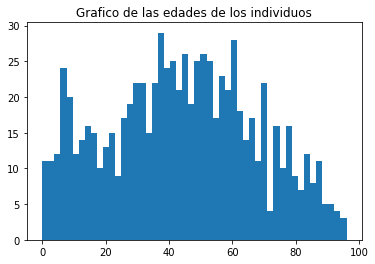

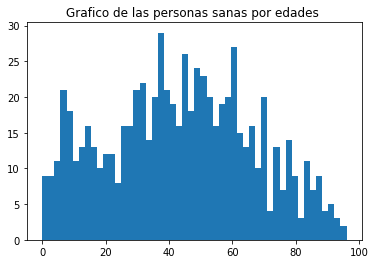

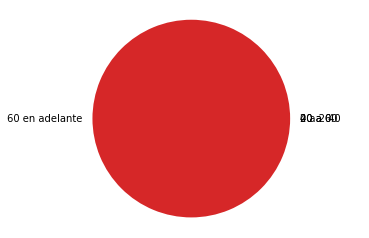

In [5]:

MiSimulador=Simulador(numpersonas=numpersonas,personasEdificio=personasEdificio,maxPiso=maxPiso,mortalidadEdadesCovid=mortalidadEdadesCovid,aforoMedio=7)

#se crea un paciente que resulta ser el 0, pasandole 15 dias como dia para el cambio de estado
MiSimulador.contagio_fijo(cambioEstadoInicial,10) 
#MiSimulador.graficoPersonasEdades()
#MiSimulador.printearCatalogo()
for i in range(horassimulacion): #horas que pasa la simulacion 
    '''
    Datos inventados:
    MediaIncubación:7 dias
    DesvIncubación:3 dias
    MediaDuracion:14 dias
    DescDuracion:5 dias
    '''
    MiSimulador.pasar_tiempo(mediaincubacion,desvincubacion,mediaduracion,desvduracion,posibilidadContagio)
    if MiSimulador.hora==0:  
        print("--------")
        print(" ")
        print(" ")
        print(f"Dia: {MiSimulador.dia} || Hora: {MiSimulador.hora}")
        #print(MiSimulador.serviciosDisponibles)
        #print(MiSimulador.ciudadOficinas[0].printearpersonas())
        #if MiSimulador.hora%20==0:
        #MiSimulador.printearCatalogo()
        print("-----------")
        print("")
        #MiSimulador.ciudadOficinas[0].printearpersonas()
        print("")
        print(" ")
        print(" ")
        print(" ")
        print(" ")
        print("--------")
        
MiSimulador.mostrarcementerio()
MiSimulador.graficoPersonasEdades()
MiSimulador.graficoPersonasSanas()
MiSimulador.defuncionesPorEdades()

In [ ]:
#MiSimulador.ciudadOficinas[3].horarios
MiSimulador.printearCatalogo()

In [ ]:
MiSimulador.mostrarcementerio()

In [ ]:
MiSimulador.pasar_tiempo(mediaincubacion,desvincubacion,mediaduracion,desvduracion,posibilidadContagio)
print(MiSimulador.aforoMedio)
kk=0
for i in MiSimulador.ciudadOficinas:
    print(len(i.vestibulo))

    kk+=len(i.vestibulo)
print(kk)

In [ ]:
MiSimulador.dia

In [ ]:
for i in MiSimulador.ciudadOficinas:
    print("-----------")
    print("")
    i.printearpersonas()
    print("")
    print("-----------")